In [2]:
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split


Using TensorFlow backend.


In [3]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [4]:
#load the data

training_set = pd.read_csv('fashion-mnist_train.csv')
testing_set = pd.read_csv('fashion-mnist_test.csv')



In [5]:
#Preprocess the data 
# pixels values for each image
X_train = np.array(training_set.iloc[:,1:])
X_test = np.array(testing_set.iloc[:,1:])
X_train = X_train/255
X_test = X_test/255

#label for each image
y_train = to_categorical(np.array(training_set.iloc[:,0])) 
y_test = to_categorical(np.array(testing_set.iloc[:,0]))

In [6]:
# Building a first baseline model
pixel_numbers = X_train.shape[1]
number_of_classes = y_test.shape[1]
model = Sequential()
model.add(Dropout(0.2, input_shape=(pixel_numbers,)))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(number_of_classes, activation='softmax'))


In [7]:
# Compiling the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [8]:
# Training the model
batch_size = 150
epochs = 20
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 16s 275us/step - loss: 0.5689 - acc: 0.7936 - val_loss: 0.4277 - val_acc: 0.8443
Epoch 2/20
60000/60000 [==============================] - 16s 264us/step - loss: 0.4256 - acc: 0.8442 - val_loss: 0.3640 - val_acc: 0.8645
Epoch 3/20
60000/60000 [==============================] - 16s 261us/step - loss: 0.3931 - acc: 0.8553 - val_loss: 0.3583 - val_acc: 0.8643
Epoch 4/20
60000/60000 [==============================] - 16s 270us/step - loss: 0.3712 - acc: 0.8625 - val_loss: 0.3484 - val_acc: 0.8708
Epoch 5/20
60000/60000 [==============================] - 17s 278us/step - loss: 0.3558 - acc: 0.8673 - val_loss: 0.3334 - val_acc: 0.8736
Epoch 6/20
60000/60000 [==============================] - 18s 303us/step - loss: 0.3476 - acc: 0.8707 - val_loss: 0.3274 - val_acc: 0.8717
Epoch 7/20
60000/60000 [==============================] - 21s 343us/step - loss: 0.3341 - acc: 0.8745 - val_loss: 0.

In [9]:
# Evaluate the model 
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.281452508602
Test accuracy: 0.8988


In [10]:
# Make predictions about the classes
predictions = model.predict_classes(X_test,batch_size=150)  


In [11]:
# Data Model visualization
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_1 (Dropout)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
None

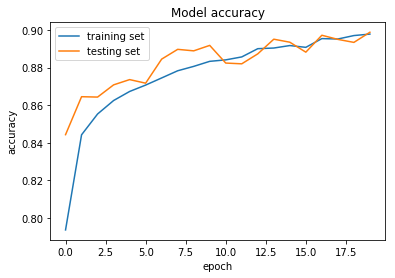

In [12]:
# Accuracy visualization
training_accuracy = history.history['acc']
testing_accuracy = history.history['val_acc']
plt.plot(training_accuracy)
plt.plot(testing_accuracy)
plt.title('Model accuracy')
plt.legend(['training set', 'testing set'], loc='upper left')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

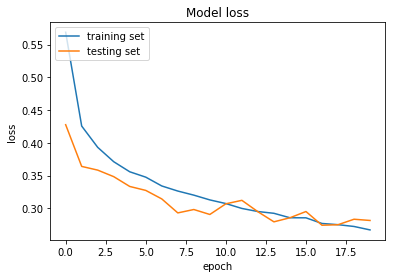

In [13]:
# Loss visualization

training_loss = history.history['loss']
testing_loss = history.history['val_loss']
plt.plot(training_loss)
plt.plot(testing_loss)
plt.title('Model loss')
plt.legend(['training set', 'testing set'], loc='upper left')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.show()
